<center>
# How to calculate shear
</center>

***

In [1]:
import datetime
print('Last updated: {}'.format(datetime.date.today().strftime('%d %B, %Y')))

Last updated: 18 July, 2019


***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

## Outline: 

The brightwind library allows for shear to be calculated from wind speed measurements using either the power law or the logarithmic law, through the calculation of the shear exponent (alpha) or the roughness coefficient respectively. Alpha/roughness values can be calculated by average wind speed, time of day/month, direction sector or by individual timestamp. The calculated shear can then be applied to wind speed timeseries to scale the wind speeds from one height to another.

This tutorial will cover: 
1. How to calculate average shear and use it to scale a wind speed timeseries.
1. How to calculate shear by direction sector.
1. How to calculate shear by time of day and month.
1. How to calculate shear by individual timestamp.
1. How to scale a wind speed timeseries using a predefined value of alpha/roughness.


***

### Step 1: Calculate average shear and scale a wind speed timeseries

The average shear exponent can be calculated across an entire timeseries using the `Average` class in the brightwind library.

- First, upload the relevant data, defining the anemometers data and heights of these anemometers.

In [2]:
import brightwind as bw
import pprint

# load data as dataframe and apply cleaning (see previous tutorials for these.)
data = bw.load_csv(r'C:\Users\Stephen\Documents\Analysis\demo_data.csv')
data = bw.apply_cleaning(data, r'C:\Users\Stephen\Documents\Analysis\demo_cleaning_file.csv')

# Specify columns in data which contain the anemometer measurements from which to calculate shear
anemometers = data[['Spd80mN','Spd60mN','Spd40mN']]

# Specify the heights of these anemometers in a list
heights = [80, 60, 40]

Cleaning applied. (Please remember to assign the cleaned returned DataFrame to a variable.)


<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- To calculate average shear from the data contained in `anemometers` using the power law, type the following:

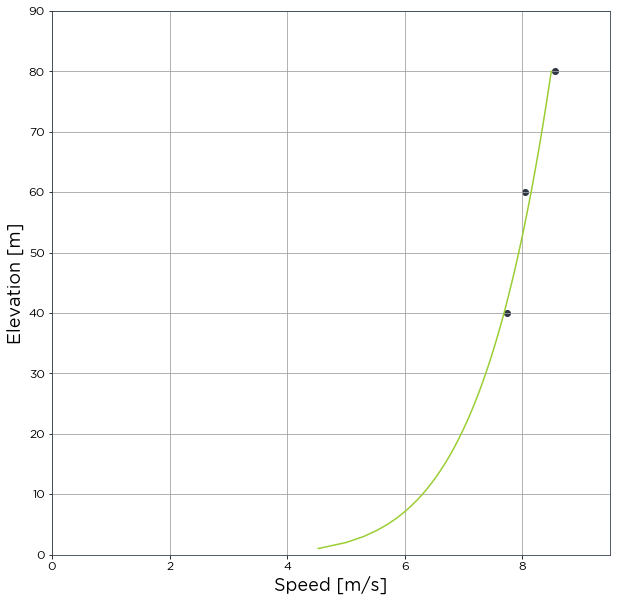

In [3]:
avg_shear_by_power_law = bw.Shear.Average(anemometers, heights)

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- To calculate shear using the log law instead of the power law, simply add the argument `calc_method='log_law'`. This is an option for all shear calculations. 

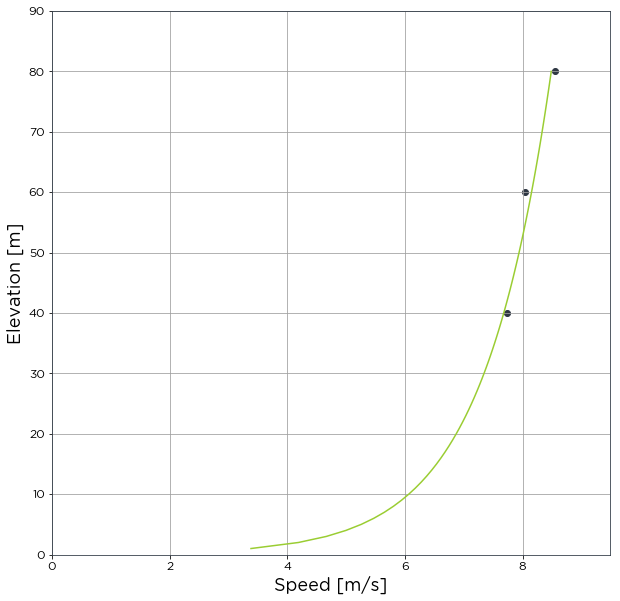

In [4]:
avg_shear_by_log_law = bw.Shear.Average(anemometers, heights, calc_method='log_law')

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- This function returns an object, i.e. `avg_shear_by_power_law` or  `avg_shear_by_log_law`, which contains lots of information about the calculation that was carried out. 

- To view what information is available, such as a plot and the average alpha value, type the following and press 'Tab':

<div style='margin-top: 3em; margin-bottom: 3em;'>
<center>
![image1](images/how_to_calculate_shear_1.png)
</center>
</div>

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- To show the average alpha calculated, type: 

In [5]:
avg_shear_by_power_law.alpha

0.1434292905861121

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- To show the average roughness calculated, type: 

In [6]:
avg_shear_by_log_law.roughness

0.054854089027648524

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- To show the plot, type:

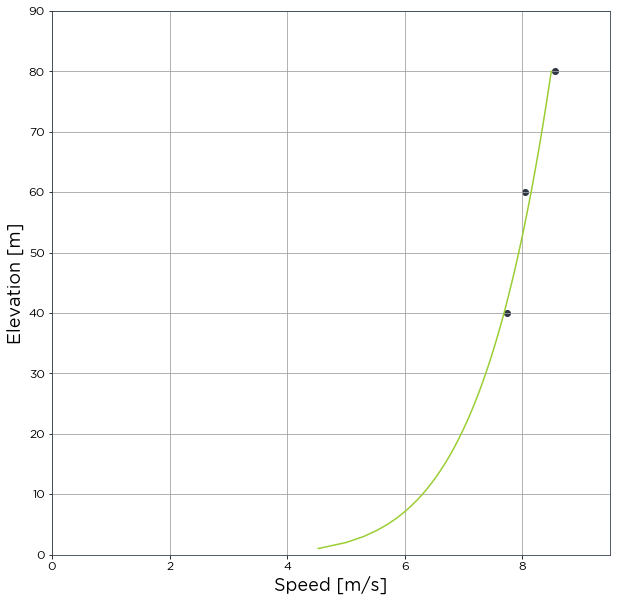

In [7]:
avg_shear_by_power_law.plot

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- Other useful information about the object can be obtained using `.info`. This is wrapped with the 'pretty print' library to make it more readable.

In [8]:
pprint.pprint(avg_shear_by_log_law.info)

{'input data': {'calculation_method': 'log_law',
                'input_wind_speeds': {'column_names': ['Spd80mN',
                                                       'Spd60mN',
                                                       'Spd40mN'],
                                      'heights(m)': [80, 60, 40],
                                      'min_spd(m/s)': 3}},
 'output data': {'concurrent_period_in_years': 1.511,
                 'roughness': 0.054854089027648524}}


<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

Once the alpha/roughness values have been calculated, they can be applied to a wind speed timeseries to scale the wind speeds from one height to another. 

- To scale the wind speed timeseries, i.e. `data['Spd80mN']`, from 80 m to 100 m height using the average alpha value previously calculated, use the `.apply()` function attached to the avg_shear_by_power_law object.


In [9]:
avg_shear_by_power_law.apply(data['Spd80mN'], 80, 100).head(10) # .head(10) is simply used to not display so much data

Timestamp
2016-01-09 15:30:00         NaN
2016-01-09 15:40:00         NaN
2016-01-09 17:00:00         NaN
2016-01-09 17:10:00    7.622085
2016-01-09 17:20:00    8.236436
2016-01-09 17:30:00    8.611242
2016-01-09 17:40:00    8.394412
2016-01-09 17:50:00    7.723272
2016-01-09 18:00:00    7.799679
2016-01-09 18:10:00    8.487339
Name: Spd80mN_scaled_to_100m, dtype: float64

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- To scale the same data, but using the roughness value calculated via the log law, use the `.apply()` function attached to the `avg_shear_by_log_law` object:

In [10]:
avg_shear_by_log_law.apply(data['Spd80mN'], 80, 100).head(10)

Timestamp
2016-01-09 15:30:00         NaN
2016-01-09 15:40:00         NaN
2016-01-09 17:00:00         NaN
2016-01-09 17:10:00    7.608111
2016-01-09 17:20:00    8.221336
2016-01-09 17:30:00    8.595455
2016-01-09 17:40:00    8.379023
2016-01-09 17:50:00    7.709113
2016-01-09 18:00:00    7.785380
2016-01-09 18:10:00    8.471779
Name: Spd80mN_scaled_to_100m, dtype: float64

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- This sheared up wind speed timeseries can also be assigned to a new variable in your DataFrame.

In [11]:
data['Spd100m'] = avg_shear_by_power_law.apply(data['Spd80mN'], 80, 100)
data.Spd100m.head(10)

Timestamp
2016-01-09 15:30:00         NaN
2016-01-09 15:40:00         NaN
2016-01-09 17:00:00         NaN
2016-01-09 17:10:00    7.622085
2016-01-09 17:20:00    8.236436
2016-01-09 17:30:00    8.611242
2016-01-09 17:40:00    8.394412
2016-01-09 17:50:00    7.723272
2016-01-09 18:00:00    7.799679
2016-01-09 18:10:00    8.487339
Name: Spd100m, dtype: float64

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

It is also possible to plot the two shear profiles using both calculation methods overlaid on each other using the argument `plot_both`. In addition, the profiles can be extended up to any height using `max_plot_height`. The apply function will only apply the resulting shear based on the `calc_method` specified, in this case 'power_law'.

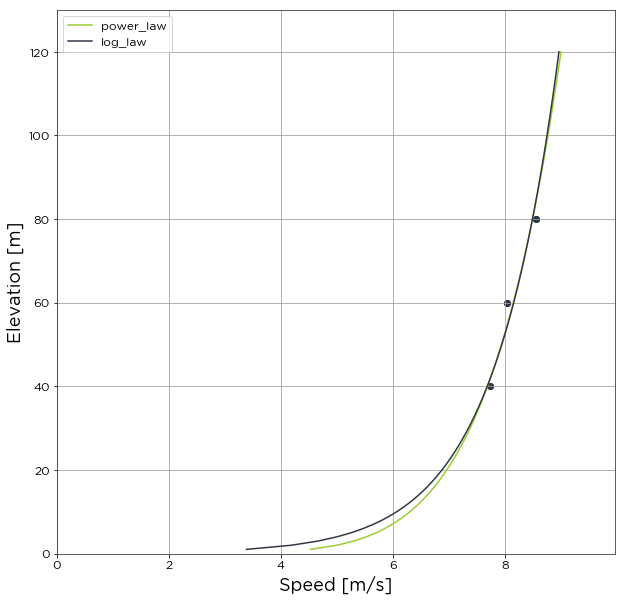

In [12]:
avg_shear_by_power_law = bw.Shear.Average(anemometers, heights, plot_both=True, max_plot_height=120)

***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

### Step 2: Calculate shear by direction sector

If you have direction measurements to accompany wind speed measurements, the shear can be calculated for specified direction sectors using the `BySector` class. 

- To calculate the shear by direction sector, simply type:

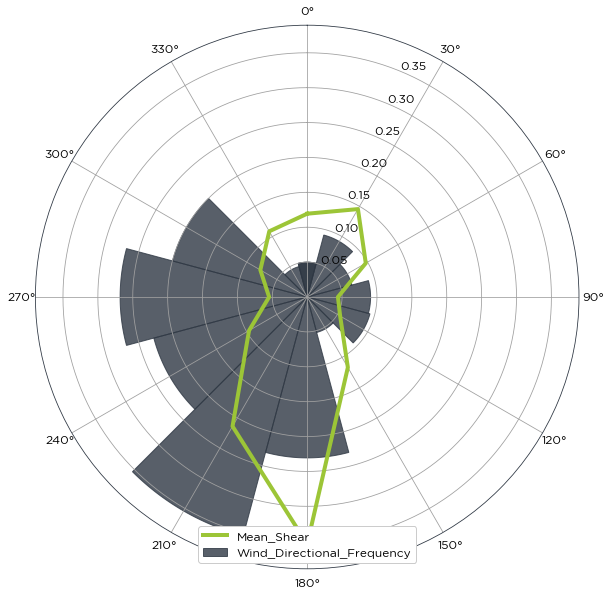

In [13]:
shear_by_sector_power_law = bw.Shear.BySector(anemometers, heights, data['Dir78mS'])

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- Again, various information such as the alpha values can be displayed from this object:

In [14]:
shear_by_sector_power_law.alpha

345.0-15.0     0.119370
15.0-45.0      0.145463
45.0-75.0      0.096945
75.0-105.0     0.044056
105.0-135.0    0.054538
135.0-165.0    0.116558
165.0-195.0    0.354113
195.0-225.0    0.213977
225.0-255.0    0.096221
255.0-285.0    0.054575
285.0-315.0    0.077513
315.0-345.0    0.108680
dtype: float64

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- The direction bins can be defined by the user for use in the BySector calculations. 
- These bins must begin at 0, be listed as increasing and advise they are even sizes.
- For example, to use the custom bins [0,30,60,90,120,150,180,210,240,270,300,330,360], simply type the following: 

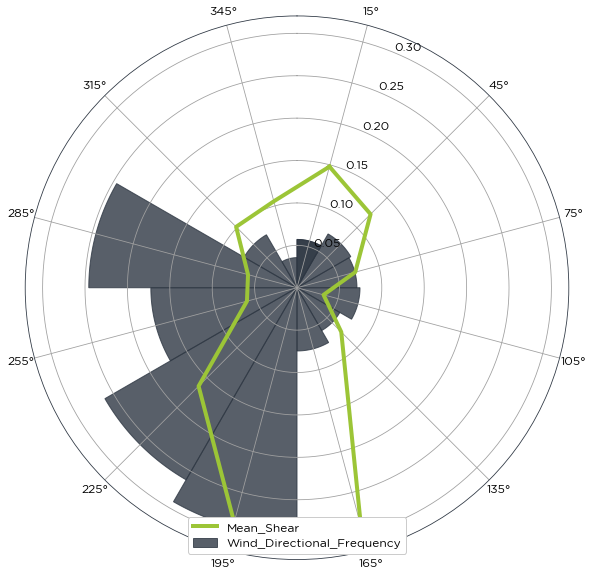

In [15]:
custom_bins = [0,30,60,90,120,150,180,210,240,270,300,330,360]
shear_by_sector_power_law_custom_bins = bw.Shear.BySector(anemometers, heights, data['Dir78mS'], 
                                                          direction_bin_array=custom_bins)

In [16]:
shear_by_sector_power_law.alpha

345.0-15.0     0.119370
15.0-45.0      0.145463
45.0-75.0      0.096945
75.0-105.0     0.044056
105.0-135.0    0.054538
135.0-165.0    0.116558
165.0-195.0    0.354113
195.0-225.0    0.213977
225.0-255.0    0.096221
255.0-285.0    0.054575
285.0-315.0    0.077513
315.0-345.0    0.108680
dtype: float64

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

To scale the same data, but using the alpha values calculated for each direction section use the `.apply()` function attached to the `shear_by_sector_by_power_law` object. Corresponding wind direction measurements for the wind speeds to be scaled must also be passed to the function.

- Using `data['Dir78mS']` as the direction measurements, type:

In [17]:
shear_by_sector_power_law.apply(data['Spd80mN'], data['Dir78mS'], 80, 100).head(10)

Timestamp
2016-01-09 17:10:00     7.472387
2016-01-09 17:20:00     8.074672
2016-01-09 17:30:00     8.442117
2016-01-09 17:40:00     8.229546
2016-01-09 17:50:00     7.571587
2016-01-09 18:00:00     7.646493
2016-01-09 18:10:00     8.320648
2016-01-09 18:20:00     9.535341
2016-01-09 18:30:00    10.031341
2016-01-09 18:40:00    10.517218
Name: Spd80mN_scaled_to_100m, dtype: float64

***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

### Step 3: Calculate shear by time of day and month

Shear can also be calculated by time of day and month using the `TimeOfDay` class. To do so, type:

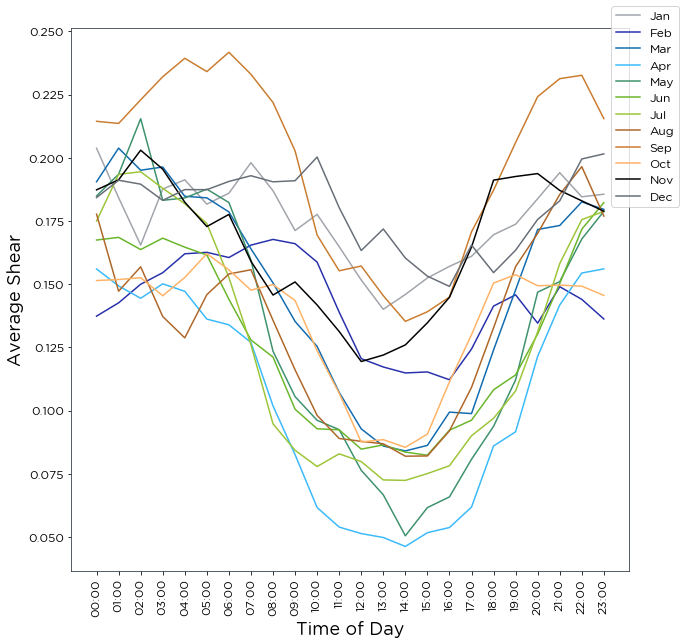

In [18]:
shear_by_tod_power_law = bw.Shear.TimeOfDay(anemometers, heights, segments_per_day=24, plot_type='line')

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- The alpha values calculated are saved in a DataFrame and can be accessed using `.alpha()`:

In [19]:
shear_by_tod_power_law.alpha

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
00:00:00,0.203745,0.137365,0.190512,0.156005,0.184894,0.167457,0.174981,0.177678,0.214404,0.151436,0.187305,0.184245
01:00:00,0.184187,0.142620,0.203802,0.149316,0.193490,0.168509,0.193434,0.147225,0.213561,0.151838,0.191275,0.191104
02:00:00,0.165501,0.149974,0.195065,0.144426,0.215443,0.163694,0.194465,0.156861,0.222912,0.152570,0.202989,0.189549
03:00:00,0.187611,0.154534,0.196334,0.150126,0.183169,0.168200,0.187914,0.137204,0.232028,0.145416,0.195471,0.183143
04:00:00,0.191284,0.162013,0.184757,0.147184,0.184090,0.164632,0.181813,0.128768,0.239333,0.152643,0.182418,0.187397
05:00:00,0.181648,0.162595,0.184140,0.136194,0.187579,0.161545,0.173963,0.145848,0.234071,0.162066,0.172788,0.187372
06:00:00,0.185978,0.160536,0.178574,0.133937,0.182293,0.144034,0.152627,0.154029,0.241704,0.155654,0.177581,0.190635
07:00:00,0.198043,0.165445,0.163970,0.126975,0.159511,0.127946,0.126003,0.155703,0.232996,0.147648,0.159044,0.192888
08:00:00,0.186950,0.167700,0.150501,0.101867,0.123486,0.121164,0.094774,0.135711,0.221852,0.149835,0.145703,0.190476
09:00:00,0.171201,0.166015,0.135286,0.082590,0.105539,0.100572,0.084312,0.116124,0.202722,0.143551,0.150881,0.190909


<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- Arguments such as `segments_per_day` and `segement_start_time` can be set to specify the number of time period segments in a day and the start time of the first segment. Different plot types are also available, such as `'step'` and `'12x24'`, shown below.

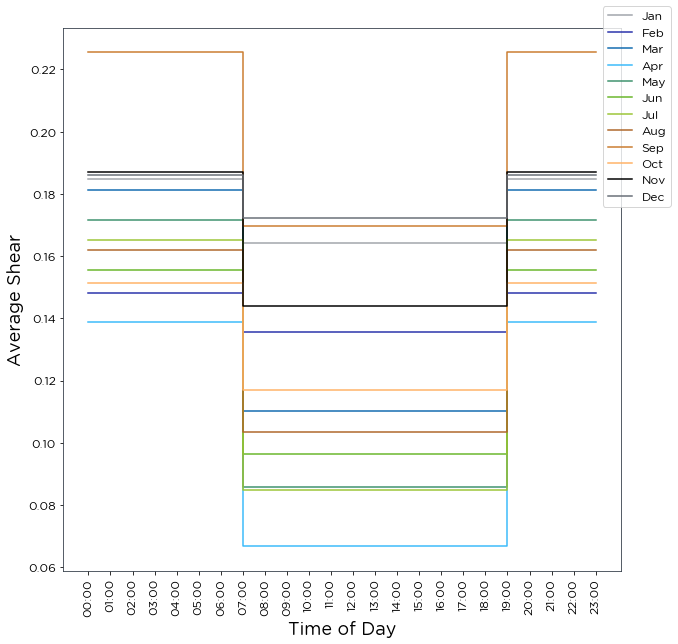

In [20]:
shear_by_tod_power_law = bw.Shear.TimeOfDay(anemometers, heights, segments_per_day=2, segment_start_time=7, plot_type='step')

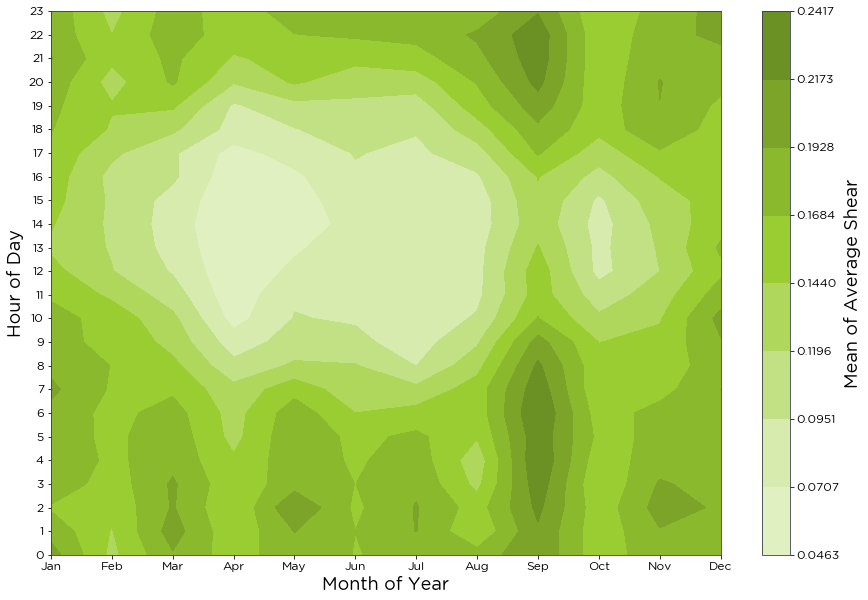

In [21]:
shear_by_tod_power_law = bw.Shear.TimeOfDay(anemometers, heights, segments_per_day=24, segment_start_time=7, plot_type='12x24')

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- By setting `by_month=False`, shear is averaged over all months for each daily segment:

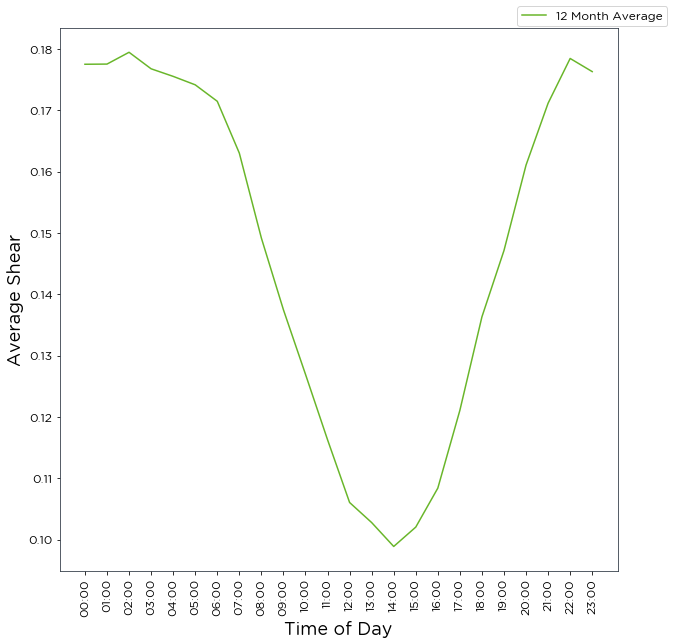

In [22]:
shear_by_tod_power_law = bw.Shear.TimeOfDay(anemometers, heights, segments_per_day=24, segment_start_time=7, 
                                            by_month=False, plot_type='line')

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- To apply the shear values calculated, as previously:

In [23]:
shear_by_tod_power_law.apply(data['Spd80mN'],80,100).head(10)

FloatProgress(value=0.0, bar_style='success', description='Calculating', max=288.0)

2016-01-09 15:30:00         NaN
2016-01-09 15:40:00         NaN
2016-01-09 17:00:00         NaN
2016-01-09 17:10:00    7.584182
2016-01-09 17:20:00    8.195478
2016-01-09 17:30:00    8.568421
2016-01-09 17:40:00    8.352669
2016-01-09 17:50:00    7.684866
2016-01-09 18:00:00    7.787329
2016-01-09 18:10:00    8.473901
Name: Spd80mN_scaled_to_100m, dtype: float64

***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

### Step 4: Calculating shear by timestamp

Shear can be calculated for each individual timestamp of a wind speed data series using the `TimeSeries` class. This takes some time, as tens of thousands of calculations must be carried out, so try it first on a subset of the data, i.e. the first 1000 entries. To do so, type:

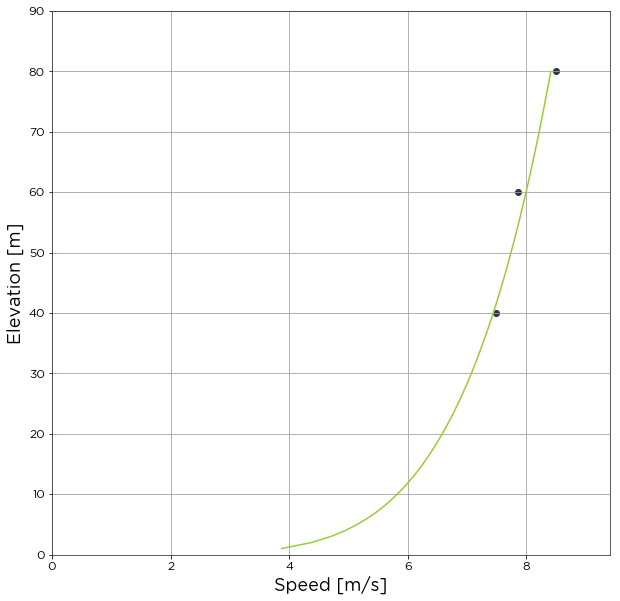

In [24]:
anemometers_subset = anemometers[:1000]
ts_by_power_law = bw.Shear.TimeSeries(anemometers_subset, heights)

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

In other methods such as `Average` and `BySector`, shear is only calculated for each timestamp where an anemometer reading exists at each height. This can be problamatic when calculating shear by individual timestamps. To maximise the ammount of data used for shear calculations and increase coverage we can calculate shear for every timestamp where two or more anemometer readings exist. If you wish to do this, pass the `maximise_data=True` argument to the function. Please be aware that due to the nature of calculating shear for every timestamp, this function takes some time to run.

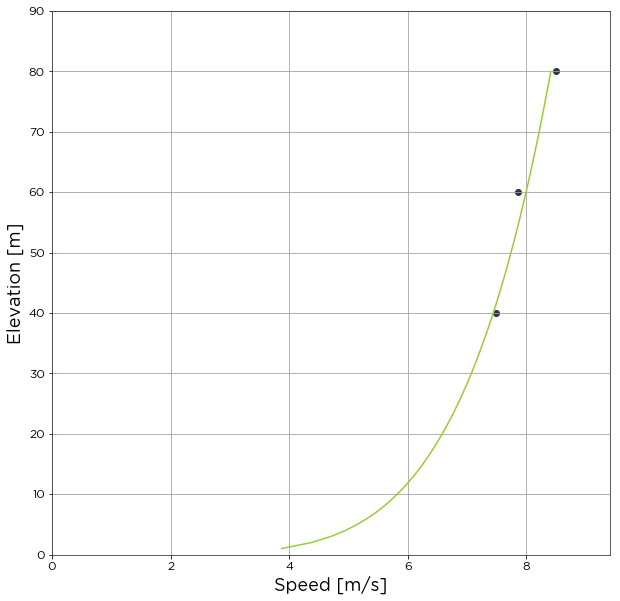

In [25]:
ts_by_power_law_max = bw.Shear.TimeSeries(anemometers_subset, heights, maximise_data=True)

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- As can be seen in the `.info` of each object, the coverage increased when `maximise_data` was used.  

In [26]:
pprint.pprint(ts_by_power_law.info)

{'input data': {'calculation_method': 'power_law',
                'input_wind_speeds': {'column_names': ['Spd80mN',
                                                       'Spd60mN',
                                                       'Spd40mN'],
                                      'heights(m)': [80, 60, 40],
                                      'min_spd(m/s)': 3}},
 'output data': {'alpha': Timestamp
2016-01-09 17:10:00    0.237991
2016-01-09 17:20:00   -0.027865
2016-01-09 17:30:00    0.002393
2016-01-09 17:40:00    0.028834
2016-01-09 17:50:00   -0.028915
2016-01-09 18:00:00   -0.006296
2016-01-09 18:10:00    0.078150
2016-01-09 18:20:00   -0.019781
2016-01-09 18:30:00    0.150555
2016-01-09 18:40:00    0.080081
2016-01-09 18:50:00    0.078663
2016-01-09 19:00:00    0.007701
2016-01-09 19:10:00    0.060346
2016-01-09 19:20:00    0.049886
2016-01-09 19:30:00    0.001436
2016-01-09 19:40:00   -0.044120
2016-01-09 19:50:00    0.068740
2016-01-09 20:00:00    0.376291
2016-01-09 20

In [27]:
pprint.pprint(ts_by_power_law_max.info)

{'input data': {'calculation_method': 'power_law',
                'input_wind_speeds': {'column_names': ['Spd80mN',
                                                       'Spd60mN',
                                                       'Spd40mN'],
                                      'heights(m)': [80, 60, 40],
                                      'min_spd(m/s)': 3}},
 'output data': {'alpha': Timestamp
2016-01-09 17:10:00    0.237991
2016-01-09 17:20:00   -0.027865
2016-01-09 17:30:00    0.002393
2016-01-09 17:40:00    0.028834
2016-01-09 17:50:00   -0.028915
2016-01-09 18:00:00   -0.006296
2016-01-09 18:10:00    0.078150
2016-01-09 18:20:00   -0.019781
2016-01-09 18:30:00    0.150555
2016-01-09 18:40:00    0.080081
2016-01-09 18:50:00    0.078663
2016-01-09 19:00:00    0.007701
2016-01-09 19:10:00    0.060346
2016-01-09 19:20:00    0.049886
2016-01-09 19:30:00    0.001436
2016-01-09 19:40:00   -0.044120
2016-01-09 19:50:00    0.068740
2016-01-09 20:00:00    0.376291
2016-01-09 20

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

To apply the alpha values calculated to a wind series with corresponding timestamps:

In [28]:
ts_by_power_law.apply(data['Spd80mN'], 80, 100).head(10)

Timestamp
2016-01-09 17:10:00     7.784625
2016-01-09 17:20:00     7.927554
2016-01-09 17:30:00     8.344454
2016-01-09 17:40:00     8.182478
2016-01-09 17:50:00     7.431892
2016-01-09 18:00:00     7.543394
2016-01-09 18:10:00     8.364604
2016-01-09 18:20:00     9.378512
2016-01-09 18:30:00    10.248585
2016-01-09 18:40:00    10.577334
Name: Spd80mN_scaled_to_100m, dtype: float64

***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

### Step 4: Scale a wind speed timeseries using a predefined value of alpha/roughness

A wind speed timeseries can also be scaled using a user-defined fixed value for alpha or roughness. 

- For example, to scale the wind speed measurements, `data['Spd80mN']`, from 80 m to 100 m, using an alpha value of 0.2, type:

In [29]:
bw.Shear.scale(data['Spd80mN'], 80, 100, alpha=0.2).head(10)

Timestamp
2016-01-09 15:30:00         NaN
2016-01-09 15:40:00         NaN
2016-01-09 17:00:00         NaN
2016-01-09 17:10:00    7.718911
2016-01-09 17:20:00    8.341067
2016-01-09 17:30:00    8.720634
2016-01-09 17:40:00    8.501050
2016-01-09 17:50:00    7.821384
2016-01-09 18:00:00    7.898761
2016-01-09 18:10:00    8.595157
Name: Spd80mN, dtype: float64

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

- To scale the wind speed measurements, `data['Spd80mN']`, from 80 m to 100 m, using a roughness of 0.3, type:

In [30]:
bw.Shear.scale(data['Spd80mN'], 80, 100, roughness=0.3, calc_method='log_law').head(10)

Timestamp
2016-01-09 15:30:00         NaN
2016-01-09 15:40:00         NaN
2016-01-09 17:00:00         NaN
2016-01-09 17:10:00    7.676888
2016-01-09 17:20:00    8.295657
2016-01-09 17:30:00    8.673157
2016-01-09 17:40:00    8.454769
2016-01-09 17:50:00    7.778803
2016-01-09 18:00:00    7.855759
2016-01-09 18:10:00    8.548364
Name: Spd80mN, dtype: float64

***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>